In [ ]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
circle = np.array([[np.cos(x),np.sin(x)] for x in np.random.rand(100)*2*np.pi])

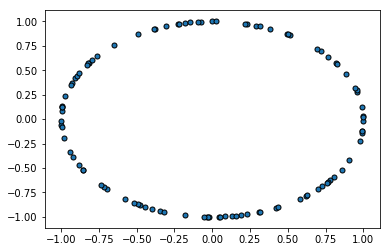

In [3]:
plt.scatter(circle[:, 0], circle[:, 1], marker='o',
            s=25, edgecolor='k')

In [4]:
X, Y = make_blobs(n_samples=70, centers=circle, n_features=2,
                 random_state=0,cluster_std =0.1)

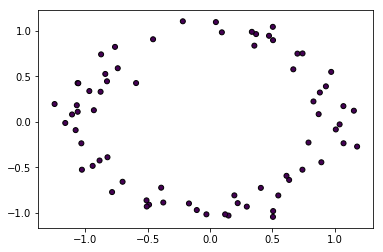

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=np.ones(70),
            s=25, edgecolor='k')

In [6]:
r = np.random.uniform(-2,2,(200,2))

In [7]:
lr = (np.min(euclidean_distances(circle,r),axis = 0)>0.1)*1.

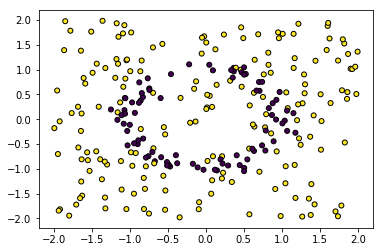

In [8]:
plt.scatter(r[:, 0], r[:, 1], marker='o', c=lr,
            s=25, edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=np.ones(70),
            s=25, edgecolor='k')

In [9]:
Xtrain = np.concatenate((r,X))
Ytrain = np.concatenate((lr,np.zeros(70))).astype(float)
Xtrain.shape,Ytrain.shape
Ytrain = Ytrain.reshape(-1,1)
Ytrain.shape

(270, 1)

In [11]:
from net_utils import *

In [12]:
t = np.linspace(-2, 2,100, endpoint=False)
T = np.zeros((10100,2))
a=0
for i in t:
    for j in t:
        T[a]=np.array([i,j])
        a+=1
    a+=1

In [29]:
model = Simple_Net()
#optimizer = optim.Adam(model.parameters(), weight_decay=0.01)
optimizer = Adam_bis(model.parameters(), prec = 4,weight_decay=0)
criterion = F.binary_cross_entropy_with_logits
file_dataset = csvDataset(Xtrain,Ytrain,transform= ToTensor())
final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=3, shuffle=True)
inference_dataset = csvDataset(T,np.zeros((10100,2)),transform= ToTensor())
inference_loader = torch.utils.data.DataLoader(inference_dataset,batch_size=10100, shuffle=False)

In [30]:
model,train_accuracy,eval_n = train_model_cc_fast(model, final_loader,inference_loader, criterion,
    optimizer,Xtrain.shape[0], num_epochs=49)

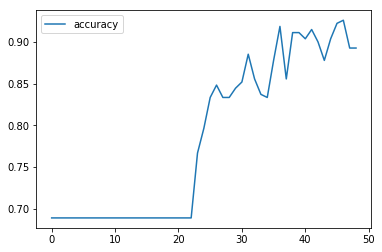

In [31]:
plt.plot(train_accuracy,label='accuracy')
plt.legend()

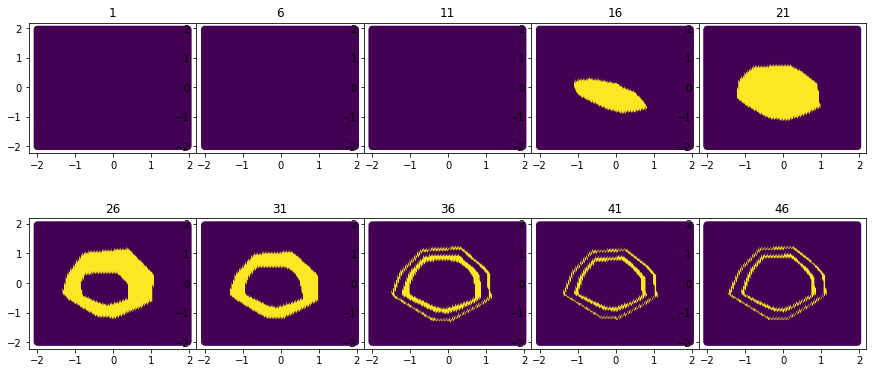

In [34]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):
    rr = eval_n[i*5].reshape(10100)
    axs[i].scatter(T[:, 0], T[:, 1], c =rr)
    axs[i].set_title(str(1+i*5))